In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list
from statsmodels.stats import multitest

# Clustering and Heatmap

In [2]:
Expression = pd.read_csv("all_annotated.csv")#read in the data
Expression

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
0,FBtr0114258,CR41571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,FBtr0346770,CG45784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,FBtr0302440,CR12798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,FBtr0302347,CR40182,23.712564,11.967821,20.767498,13.566818,18.802116,26.802691,22.819895,11.682728,21.894249,13.922059,16.482141,12.622680,31.800016,22.883186,14.330216,17.20257
4,FBtr0346769,CG45783,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34713,FBtr0114187,CR40502,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
34714,FBtr0304147,CR40719,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
34715,FBtr0114216,CR40679,2.011199,0.000000,7.994137,2.064200,3.141665,0.000000,1.519102,9.190801,13.475658,1.771435,4.649351,7.004174,6.904506,0.835856,1.151747,1.98591
34716,FBtr0114222,CR40743,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


In [3]:

median_values = Expression[Expression.median(axis=1) > 0]#taking out genes with a median expression of 0
median_values

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
3,FBtr0302347,CR40182,23.712564,11.967821,20.767498,13.566818,18.802116,26.802691,22.819895,11.682728,21.894249,13.922059,16.482141,12.622680,31.800016,22.883186,14.330216,17.202570
8,FBtr0113885,Parp,10.997173,0.000000,0.000000,0.000000,14.805335,0.000000,17.601667,10.729349,0.000000,0.000000,14.888651,14.518989,20.343670,4.087385,0.000000,25.284622
9,FBtr0301810,Alg-2,19.067924,0.000000,14.832370,27.793905,22.290230,7.846396,13.839143,12.905621,18.570707,2.919183,18.402807,26.431841,27.464781,7.432775,7.349162,22.792486
10,FBtr0113895,Tim17b,6.315716,3.935390,6.244336,69.942917,67.208557,7.605970,74.979057,53.740307,44.747662,16.834093,52.928318,77.950165,80.805580,31.863932,49.121342,77.608521
11,FBtr0345179,Tim17b,119.325905,11.631035,120.137291,75.778061,72.815582,123.849213,81.234352,59.657963,48.480839,18.238514,57.343983,86.686310,87.546967,34.522255,53.219402,84.936600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,FBtr0100884,mt:Cyt-b,33.341347,1.056151,9.832860,414.872559,102.529091,25.448748,71.750275,123.175087,119.770973,0.672975,48.309597,71.916695,237.404190,43.700970,75.445251,167.244049
34665,FBtr0100886,mt:ND1,25.209366,0.638430,21.281239,517.077271,326.313934,54.783924,360.265900,222.375244,306.410706,2.153615,200.718567,392.145020,433.656708,21.621773,91.902115,681.475891
34667,FBtr0100888,mt:lrRNA,2339.313232,34.080185,927.591858,4944.716797,2251.114990,593.744141,2493.088379,1651.994141,2578.825439,76.555481,2175.402344,3736.670654,122.910004,451.278412,692.211304,4556.642090
34684,FBtr0114261,CR41590,0.072563,0.000000,0.096390,0.102807,0.000000,0.000000,0.000000,0.126345,0.902268,0.000000,0.000000,0.162814,0.165381,0.000000,0.000000,0.052507


In [4]:
transformed = median_values.iloc[:,2:].add(0.1)
transformed = np.log2(transformed.iloc[:,:])#performing the log2 transformation

In [5]:
log_FPKM = median_values.iloc[:,:2].join(transformed)
log_FPKM = log_FPKM.reset_index().iloc[:,1:] 
log_FPKM 

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
0,FBtr0302347,CR40182,4.573651,3.593093,4.383186,3.772605,4.240476,4.749679,4.518529,3.558602,4.459054,3.809626,4.051558,3.669331,4.995485,4.522507,3.851021,4.112914
1,FBtr0113885,Parp,3.472120,-3.321928,-3.321928,-3.321928,3.897757,-3.321928,4.145813,3.436875,-3.321928,-3.321928,3.905799,3.869772,4.353582,2.066050,-3.321928,4.665883
2,FBtr0301810,Alg-2,4.260622,-3.321928,3.900371,4.801878,4.484797,2.990301,3.801070,3.701063,4.222705,1.594158,4.209672,4.729653,4.784754,2.913181,2.897078,4.516802
3,FBtr0113895,Tim17b,2.681610,2.012708,2.665469,6.130167,6.072718,2.945977,6.230339,5.750615,5.486961,4.081859,5.728691,6.286330,6.338167,4.998373,5.621212,6.280001
4,FBtr0345179,Tim17b,6.899972,3.552258,6.909741,6.245611,6.188155,6.953605,6.345793,5.901059,5.602316,4.196805,5.844084,6.439396,6.453632,5.113628,5.736589,6.410012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8608,FBtr0100884,mt:Cyt-b,5.063561,0.209330,3.312209,8.696872,6.681296,4.675181,6.166922,6.945737,6.905339,-0.371506,5.597221,6.170259,7.891809,5.452891,6.239269,7.386673
8609,FBtr0100886,mt:ND1,4.661599,-0.437467,4.418274,9.014515,8.350559,5.778312,8.493319,7.797501,8.259794,1.172241,7.649749,8.615611,8.760742,4.441070,6.523595,9.412730
8610,FBtr0100888,mt:lrRNA,11.191931,5.095088,9.857502,12.271701,11.136488,9.213941,11.283776,10.690080,11.332554,6.260317,11.087133,11.867576,6.942632,8.818194,9.435277,12.153787
8611,FBtr0114261,CR41590,-2.534805,-3.321928,-2.348207,-2.301821,-3.321928,-3.321928,-3.321928,-2.143405,0.003268,-3.321928,-3.321928,-1.927886,-1.913863,-3.321928,-3.321928,-2.713053


In [6]:
#cluster by the genes
relatedness = np.array(log_FPKM.iloc[:,2:])
gene_linkage = linkage(relatedness)
gene_list = leaves_list(gene_linkage)

relatedness_clustered_once = relatedness[gene_list]

#cluster by the samples
sample_linkage = linkage(relatedness.T)
sample_list = leaves_list(sample_linkage)

relatedness_clustered_twice = relatedness_clustered_once.T[sample_list].T

subject_label = np.array(list(log_FPKM.columns)[2:])
heatmap_label = subject_label[sample_list]

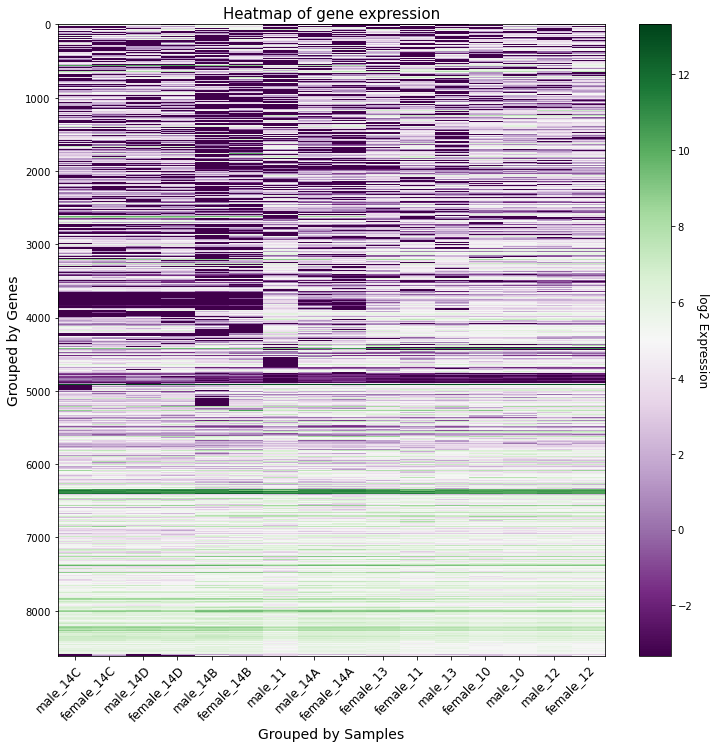

In [7]:
fig, ax = plt.subplots()
im = ax.imshow(relatedness_clustered_twice, cmap="PRGn", aspect = 'auto', interpolation='none')#the basic heatmap

#setting up the labels and ticks
ax.set_xticks(np.arange(len(heatmap_label)))
ax.set_xticklabels(heatmap_label, fontsize = 12)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('log2 Expression', fontsize = 12, rotation=-90, va="bottom")
ax.set_title("Heatmap of gene expression", fontsize = 15)
plt.xlabel('Grouped by Samples', fontsize = 14)
plt.ylabel('Grouped by Genes', fontsize = 14)
fig.set_size_inches(10.5, 10.5)
fig.tight_layout()
plt.show()

# Dendrogram

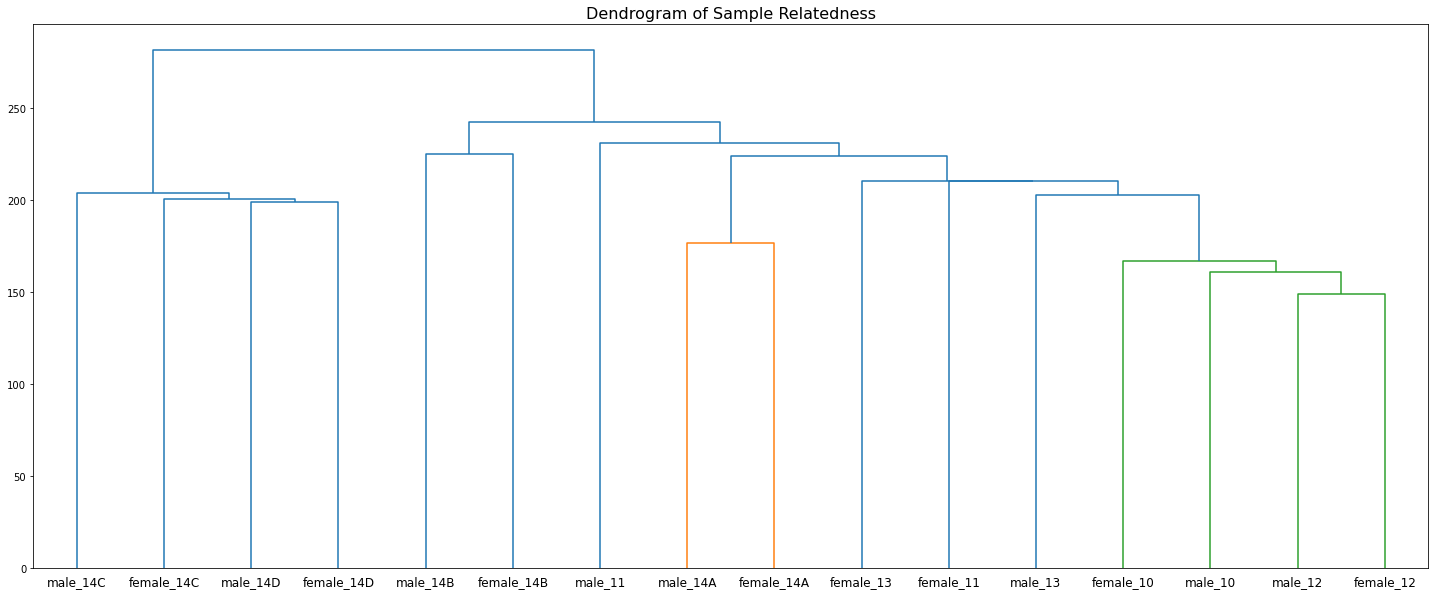

In [8]:
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(sample_linkage, labels=subject_label)
plt.title("Dendrogram of Sample Relatedness", fontsize = 16)
plt.show()

# QQ Plot with p-value calculation

In [9]:
transposed_frame = log_FPKM.T
transposed_frame.columns = transposed_frame.iloc[0, :]
transposed_frame = transposed_frame[2:]


#Making columns for the sex and stages(wrote sample for some reason in pandas frame) for data analysis
transposed_frame['sample'] = ''
transposed_frame['sex'] = ''

for i,j in transposed_frame.iterrows():
    if 'female' in i:
        transposed_frame.at[i,'sex']= 'F'
    elif 'male' in i:
        transposed_frame.at[i,'sex']= 'M'

for i,j in transposed_frame.iterrows():
    if '10' in i:
        transposed_frame.at[i,'sample']= '10'
    elif '11' in i:
        transposed_frame.at[i,'sample']= '11'
    elif '12' in i:
        transposed_frame.at[i,'sample']= '12'
    elif '13' in i:
        transposed_frame.at[i,'sample']= '13'
    elif '14' in i:
        transposed_frame.at[i,'sample']= '14'

transposed_frame

t_name,FBtr0302347,FBtr0113885,FBtr0301810,FBtr0113895,FBtr0345179,FBtr0301812,FBtr0113990,FBtr0113989,FBtr0078962,FBtr0078964,...,FBtr0100870,FBtr0100877,FBtr0100879,FBtr0100884,FBtr0100886,FBtr0100888,FBtr0114261,FBtr0114216,sample,sex
male_10,4.57365,3.47212,4.26062,2.68161,6.89997,2.70509,4.75646,3.14647,-3.32193,3.46393,...,-3.32193,2.77647,3.49208,5.06356,4.6616,11.1919,-2.5348,1.07806,10,M
male_11,3.59309,-3.32193,-3.32193,2.01271,3.55226,-3.32193,-3.32193,-3.32193,-3.32193,4.23906,...,-3.32193,-1.47013,-1.02401,0.20933,-0.437467,5.09509,-3.32193,-3.32193,11,M
male_12,4.38319,-3.32193,3.90037,2.66547,6.90974,3.38764,-3.32193,4.65375,-3.32193,4.67025,...,-3.32193,3.67005,2.11786,3.31221,4.41827,9.8575,-2.34821,3.01688,12,M
male_13,3.77261,-3.32193,4.80188,6.13017,6.24561,4.52975,4.85263,4.09329,-3.32193,4.08372,...,-3.32193,5.76376,6.54958,8.69687,9.01452,12.2717,-2.30182,1.11383,13,M
male_14A,4.24048,3.89776,4.4848,6.07272,6.18816,4.65837,4.89247,2.50752,3.46578,4.07881,...,5.24796,5.72629,6.44864,6.6813,8.35056,11.1365,-3.32193,1.69674,14,M
male_14B,4.74968,-3.32193,2.9903,2.94598,6.95361,4.43548,-3.32193,-3.32193,4.83997,-3.32193,...,-3.32193,2.67673,4.50141,4.67518,5.77831,9.21394,-3.32193,-3.32193,14,M
male_14C,4.51853,4.14581,3.80107,6.23034,6.34579,5.11012,4.42178,-3.32193,6.83412,3.48419,...,5.11985,5.72382,6.19377,6.16692,8.49332,11.2838,-3.32193,0.695194,14,M
male_14D,3.5586,3.43687,3.70106,5.75061,5.90106,4.14388,2.42338,3.73393,7.22232,-3.32193,...,4.60372,3.96227,5.82369,6.94574,7.7975,10.6901,-2.1434,3.2158,14,M
female_10,4.45905,-3.32193,4.2227,5.48696,5.60232,3.8855,4.15723,3.63683,-3.32193,4.53384,...,2.24717,3.42726,5.37293,6.90534,8.25979,11.3326,0.00326833,3.76295,10,F
female_11,3.80963,-3.32193,1.59416,4.08186,4.1968,2.03595,-3.32193,-3.32193,-3.32193,3.09516,...,-3.32193,-0.163229,-1.37436,-0.371506,1.17224,6.26032,-3.32193,0.904145,11,F


In [10]:
genes = transposed_frame.columns[0:8613] #pulling the transcript names
p_values = [] # making a list of the p-values to put into frame later
for i in range(0, len(genes)):
    gene_expression = np.array(transposed_frame[genes[i]])
    float_gene = []
    sample_stage = transposed_frame["sample"]
    for j in range(0, len(gene_expression)):
        float_gene.append(float(gene_expression[j]))
    df = pd.DataFrame({'y': float_gene, 'x':sample_stage})
    model = smf.ols(formula = "y ~ x", data = df)
    results = model.fit()
    p_values.append(results.pvalues[1])

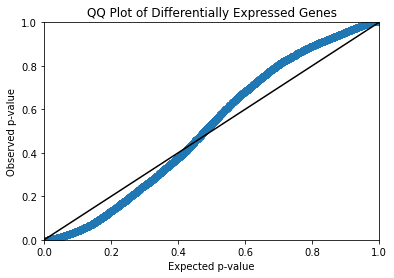

In [11]:
#making a referernce dataframe for the actual qqplot
qq_frame = pd.DataFrame({'transcript':genes, 'P':p_values})
qq_frame_sorted = qq_frame.sort_values(by = "P")

#making the theoretocal p-value columns
qq_frame_sorted['uniform_points'] = range(0, len(qq_frame_sorted))
qq_frame_sorted['uniform_pval'] = (qq_frame_sorted['uniform_points'] + 1) / len(qq_frame_sorted)


fig, ax = plt.subplots()

ax.scatter(qq_frame_sorted["uniform_pval"], qq_frame_sorted["P"])
ax.plot([1,0], [1, 0], color = "black")

plt.xlim([0, 1])
plt.ylim([0, 1])
ax.set_title("QQ Plot of Differentially Expressed Genes")
plt.xlabel("Expected p-value")
plt.ylabel("Observed p-value")
    
plt.show()

# Differential expression of genes with 10% FDR

In [12]:
#making a writable file
fs = open('gene_expression_FDR.txt', 'w')

#FDR correction
FDR_pval = np.array(qq_frame_sorted['transcript'][multitest.multipletests(qq_frame_sorted["P"], method = "fdr_bh", alpha = 0.10)[0]])

#Writing in transcripts that meet this criteria
for i in range(0, len(FDR_pval)):
    fs.write(str(FDR_pval[i]) + '\n')

fs.close()

# 10% FDR data analysis with sex covariate

In [13]:
#repeat of above p-value analysis but including sex as factor. 
sex_values = []

#Collecting beta values for volcano plotting
beta = []

for i in range(0, len(genes)):
    gene_expression = np.array(transposed_frame[genes[i]])
    float_gene = []
    sample_stage = transposed_frame["sample"]
    sex = transposed_frame["sex"]
    for j in range(0, len(gene_expression)):
        float_gene.append(float(gene_expression[j]))
    df = pd.DataFrame({'y': float_gene, 'x':sample_stage, 'z':sex})
    model = smf.ols(formula = "y ~ x + z", data = df)
    results = model.fit()
    sex_values.append(results.pvalues[1])
    beta.append(results.params[5])

In [14]:
#10% FDR analysis 
sex_frame = pd.DataFrame({'transcript':genes, 'P': sex_values})

sex_analysis = np.array(sex_frame['transcript'][multitest.multipletests(sex_frame["P"], method = "fdr_bh", alpha = 0.10)[0]])

fss = open('gene_expression_bysex.txt', 'w')
for i in range(0, len(sex_analysis)):
    fss.write(str(FDR_pval[i]) + '\n')

fss.close()

# Overlapping genes between both lists

In [15]:
#Basic math approach for calculating overlap
gene_ex = open('gene_expression_FDR.txt', 'r')
gene_ex_sex = open('gene_expression_bysex.txt', 'r')

original = 0
covariate = 0

for i in gene_ex:
    original += 1
for j in gene_ex_sex:
    covariate += 1

overlap = (covariate/original)*100

gene_ex.close()
gene_ex_sex.close()
overlap

84.05797101449275

# Volcano plot of Beta vs P-value

In [16]:
#Adding new columns to the grame
sex_frame['beta'] = beta
sex_frame['log10_p'] = -1 * np.log10(sex_frame['P'])

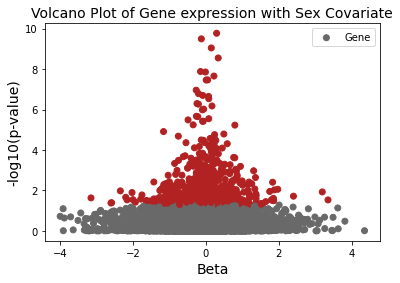

In [17]:
fig, ax = plt.subplots()

#Significant values will be red and nonsignificant will be grey
colors = ['firebrick' if p > 1.30 else 'dimgrey' for p in sex_frame["log10_p"]] #log10 value for p < 0.05 is ~1.30
ax.scatter(sex_frame["beta"], sex_frame["log10_p"], color = colors, label = 'Gene')
ax.set_title("Volcano Plot of Gene expression with Sex Covariate", fontsize = 14)
ax.set_xlabel("Beta", fontsize = 14)
ax.set_ylabel("-log10(p-value)", fontsize = 14)
ax.legend()
plt.show()